In [2]:
import xarray as xr
import numpy as np
import os

os.chdir("C:/Users/konst/Documents/Hiwi/mw3/master_thesis/") 

# Load dataset
hls = xr.load_dataset(r"data\satellite_data\hls_eifel\HLS_Monthly_Medians_2013-04_2025-01.nc")

In [9]:
hls['NDVI']  = (hls.NIR - hls.Red) / (hls.NIR + hls.Red) # Normalized Difference Vegetation Index
hls['NIRV']  = hls.NDVI * hls.NIR # Near Infrared of Vegetation
hls['NDWI']  = (hls.NIR - hls.SWIR1) / (hls.NIR + hls.SWIR1) # Normalized Difference Water Index
hls['MSAVI'] = (2 * hls.NIR + 1 - ((2 * hls.NIR + 1)**2 - 8 * (hls.NIR - hls.Red))**0.5) / 2 # Modified Soil-Adjusted Vegetation Inedx
hls['PRI']   = (hls.Green - hls.Red) / (hls.Green + hls.Red) # Photochemical Reflectance Index
hls['NBR']   = (hls.NIR - hls.SWIR2) / (hls.NIR + hls.SWIR2) # Normalized Burn Ratio

# Compute EVI safely
evi_numerator = hls.NIR - hls.Red
evi_denominator = hls.NIR + 6 * hls.Red - 7.5 * hls.Blue + 1

# Prevent division by zero or negative values in the denominator
evi_denominator = xr.where(evi_denominator <= 0, np.nan, evi_denominator)

hls['EVI'] = 2.5 * (evi_numerator / evi_denominator)

# Clip EVI values to a reasonable range (-1 to 1)
hls['EVI'] = hls['EVI'].clip(-1, 1)

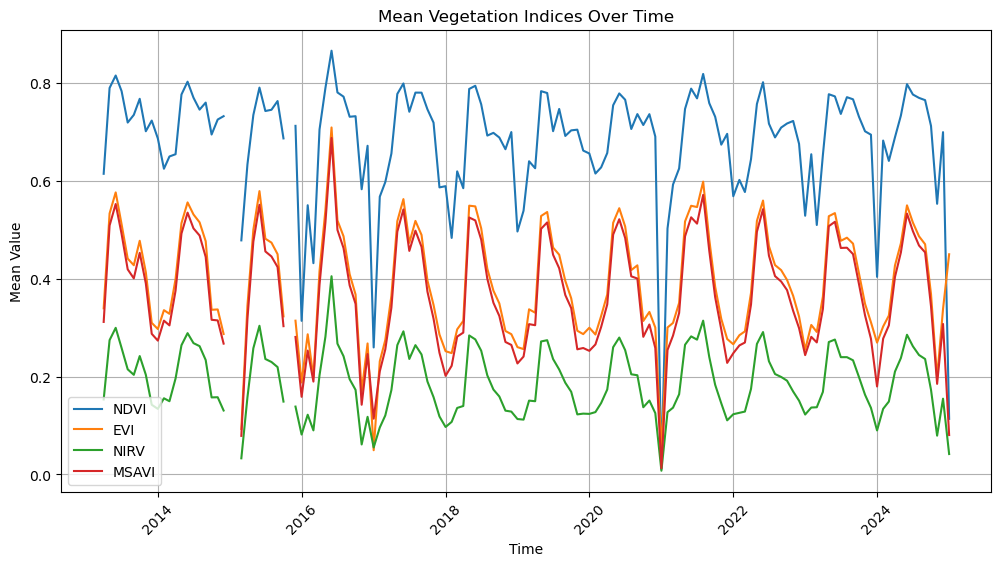

In [13]:
import matplotlib.pyplot as plt

# Compute mean values for each index over time
mean_indices = {
    'NDVI': hls['NDVI'].mean(dim=['y', 'x'], skipna=True),
    'EVI' : hls['EVI'].mean(dim=['y', 'x'], skipna=True),
    'NIRV': hls['NIRV'].mean(dim=['y', 'x'], skipna=True),
    #'NDWI': hls['NDWI'].mean(dim=['y', 'x'], skipna=True),
    'MSAVI': hls['MSAVI'].mean(dim=['y', 'x'], skipna=True)
    #'PRI': hls['PRI'].mean(dim=['y', 'x'], skipna=True),
    #'NBR': hls['NBR'].mean(dim=['y', 'x'], skipna=True)
}

# Plot all indices in one figure
plt.figure(figsize=(12, 6))

for index_name, index_values in mean_indices.items():
    plt.plot(index_values.time, index_values, label=index_name, linewidth=1.5)

# Formatting
plt.xlabel("Time")
plt.ylabel("Mean Value")
plt.title("Mean Vegetation Indices Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.show()